# Mortgage PD scorecard

## Import libraries

In [1]:
%reset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preparation

### Step 1.1: Data Loading

In [3]:
# Load the dataset
file_path = "data/mortgage_sample.csv"  # replace with the actual path or URL
df_raw = pd.read_csv(file_path)

In [4]:
df_raw.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public


In [5]:
# Display basic information about the dataset
print("\nDataset Information:")
df_raw.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-n

### Step 1.2: Data Exploration

In [6]:
# Display summary statistics
print("\nSummary Statistics:")
df_raw.describe()


Summary Statistics:


,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,6.224890e+05,622219.000000,622489.000000,622489.00000,622489.000000,...,622489.000000,622489.000000,6.224890e+05,622489.000000,622489.000000,622489.000000,622489.000000,561164.000000,561164.000000,561164.000000
mean,25147.492561,35.800806,20.570057,24.607362,137.206527,2.459649e+05,83.078239,6.702451,184.10245,1.381032,...,0.612067,0.138226,2.562539e+05,673.616922,78.975460,5.649546,198.115217,0.024278,0.042670,0.109619
std,13750.200051,11.579971,7.615170,6.739015,19.532501,2.141563e+05,24.968839,2.079246,27.65077,1.964645,...,0.487280,0.345137,2.197181e+05,71.724558,10.127052,2.978061,33.964785,0.153911,0.202113,0.427719
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.000000,107.83000,-4.146711,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13580.000000,27.000000,18.000000,21.000000,137.000000,1.020174e+05,67.109446,5.650000,158.60000,1.104163,...,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,24881.000000,34.000000,22.000000,25.000000,142.000000,1.806183e+05,82.253269,6.625000,180.52000,1.850689,...,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000
75%,37045.000000,44.000000,25.000000,28.000000,145.000000,3.374950e+05,100.634381,7.875000,212.73000,2.694111,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.456000,222.390000,0.000000,0.000000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.29000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000


In [7]:
# Check for missing values
print("\nMissing Values:")
df_raw.isnull().sum()


Missing Values:


id                             0
time                           0
orig_time                      0
first_time                     0
mat_time                       0
balance_time                   0
LTV_time                     270
interest_rate_time             0
hpi_time                       0
gdp_time                       0
uer_time                       0
REtype_CO_orig_time            0
REtype_PU_orig_time            0
REtype_SF_orig_time            0
investor_orig_time             0
balance_orig_time              0
FICO_orig_time                 0
LTV_orig_time                  0
Interest_Rate_orig_time        0
hpi_orig_time                  0
default_time               61325
payoff_time                61325
status_time                61325
sample                         0
dtype: int64

In [8]:
# Count the number of rows with missing values
null_rows = df_raw.isnull().any(axis=0)
print("\nNumber of rows with missing values:", null_rows.sum())


Number of rows with missing values: 4


In [9]:
# Explore unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in df_raw.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_raw[col].unique()}")


Unique Values in Categorical Columns:
sample: ['public' 'private']


In [10]:
df_dev = df_raw[df_raw['sample'] == 'public']
df_dev = df_dev.drop(['sample'], axis=1)

In [16]:
# First, select numerical variables only
num_vars = df_dev.select_dtypes(include=['float64', 'int64']).drop(columns=['id']).columns

print("\nDescriptive statistics:")
df_dev[num_vars].describe()


Descriptive statistics:


,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,561164.000000,561164.000000,561164.000000,561164.000000,5.611640e+05,560991.000000,561164.000000,561164.000000,561164.000000,561164.000000,...,561164.000000,561164.000000,5.611640e+05,561164.000000,561164.000000,561164.000000,561164.000000,561164.000000,561164.000000,561164.000000
mean,35.808696,20.570717,24.602273,137.268918,2.460047e+05,83.073590,6.695949,184.109081,1.381127,6.518558,...,0.612468,0.138325,2.563977e+05,673.684133,78.989666,5.646002,198.112647,0.024278,0.042670,0.109619
std,11.573767,7.590530,6.734496,19.416499,2.130185e+05,24.866695,2.072867,27.636236,1.964856,1.921484,...,0.487187,0.345241,2.186307e+05,71.680527,10.064836,2.972881,33.907391,0.153911,0.202113,0.427719
min,1.000000,-40.000000,1.000000,20.000000,0.000000e+00,0.000000,0.000000,107.830000,-4.146711,3.800000,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,27.000000,18.000000,21.000000,137.000000,1.022340e+05,67.121081,5.625000,158.600000,1.104163,4.700000,...,0.000000,0.000000,1.080800e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,34.000000,22.000000,25.000000,142.000000,1.814498e+05,82.269033,6.625000,180.520000,1.850689,5.700000,...,1.000000,0.000000,1.889000e+05,678.000000,80.000000,6.300000,216.770000,0.000000,0.000000,0.000000
75%,44.000000,25.000000,28.000000,145.000000,3.381688e+05,100.640596,7.875000,212.730000,2.694111,8.200000,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.450000,222.390000,0.000000,0.000000,0.000000
max,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.290000,5.132464,10.000000,...,1.000000,1.000000,8.000000e+06,840.000000,178.600000,18.000000,226.290000,1.000000,1.000000,2.000000


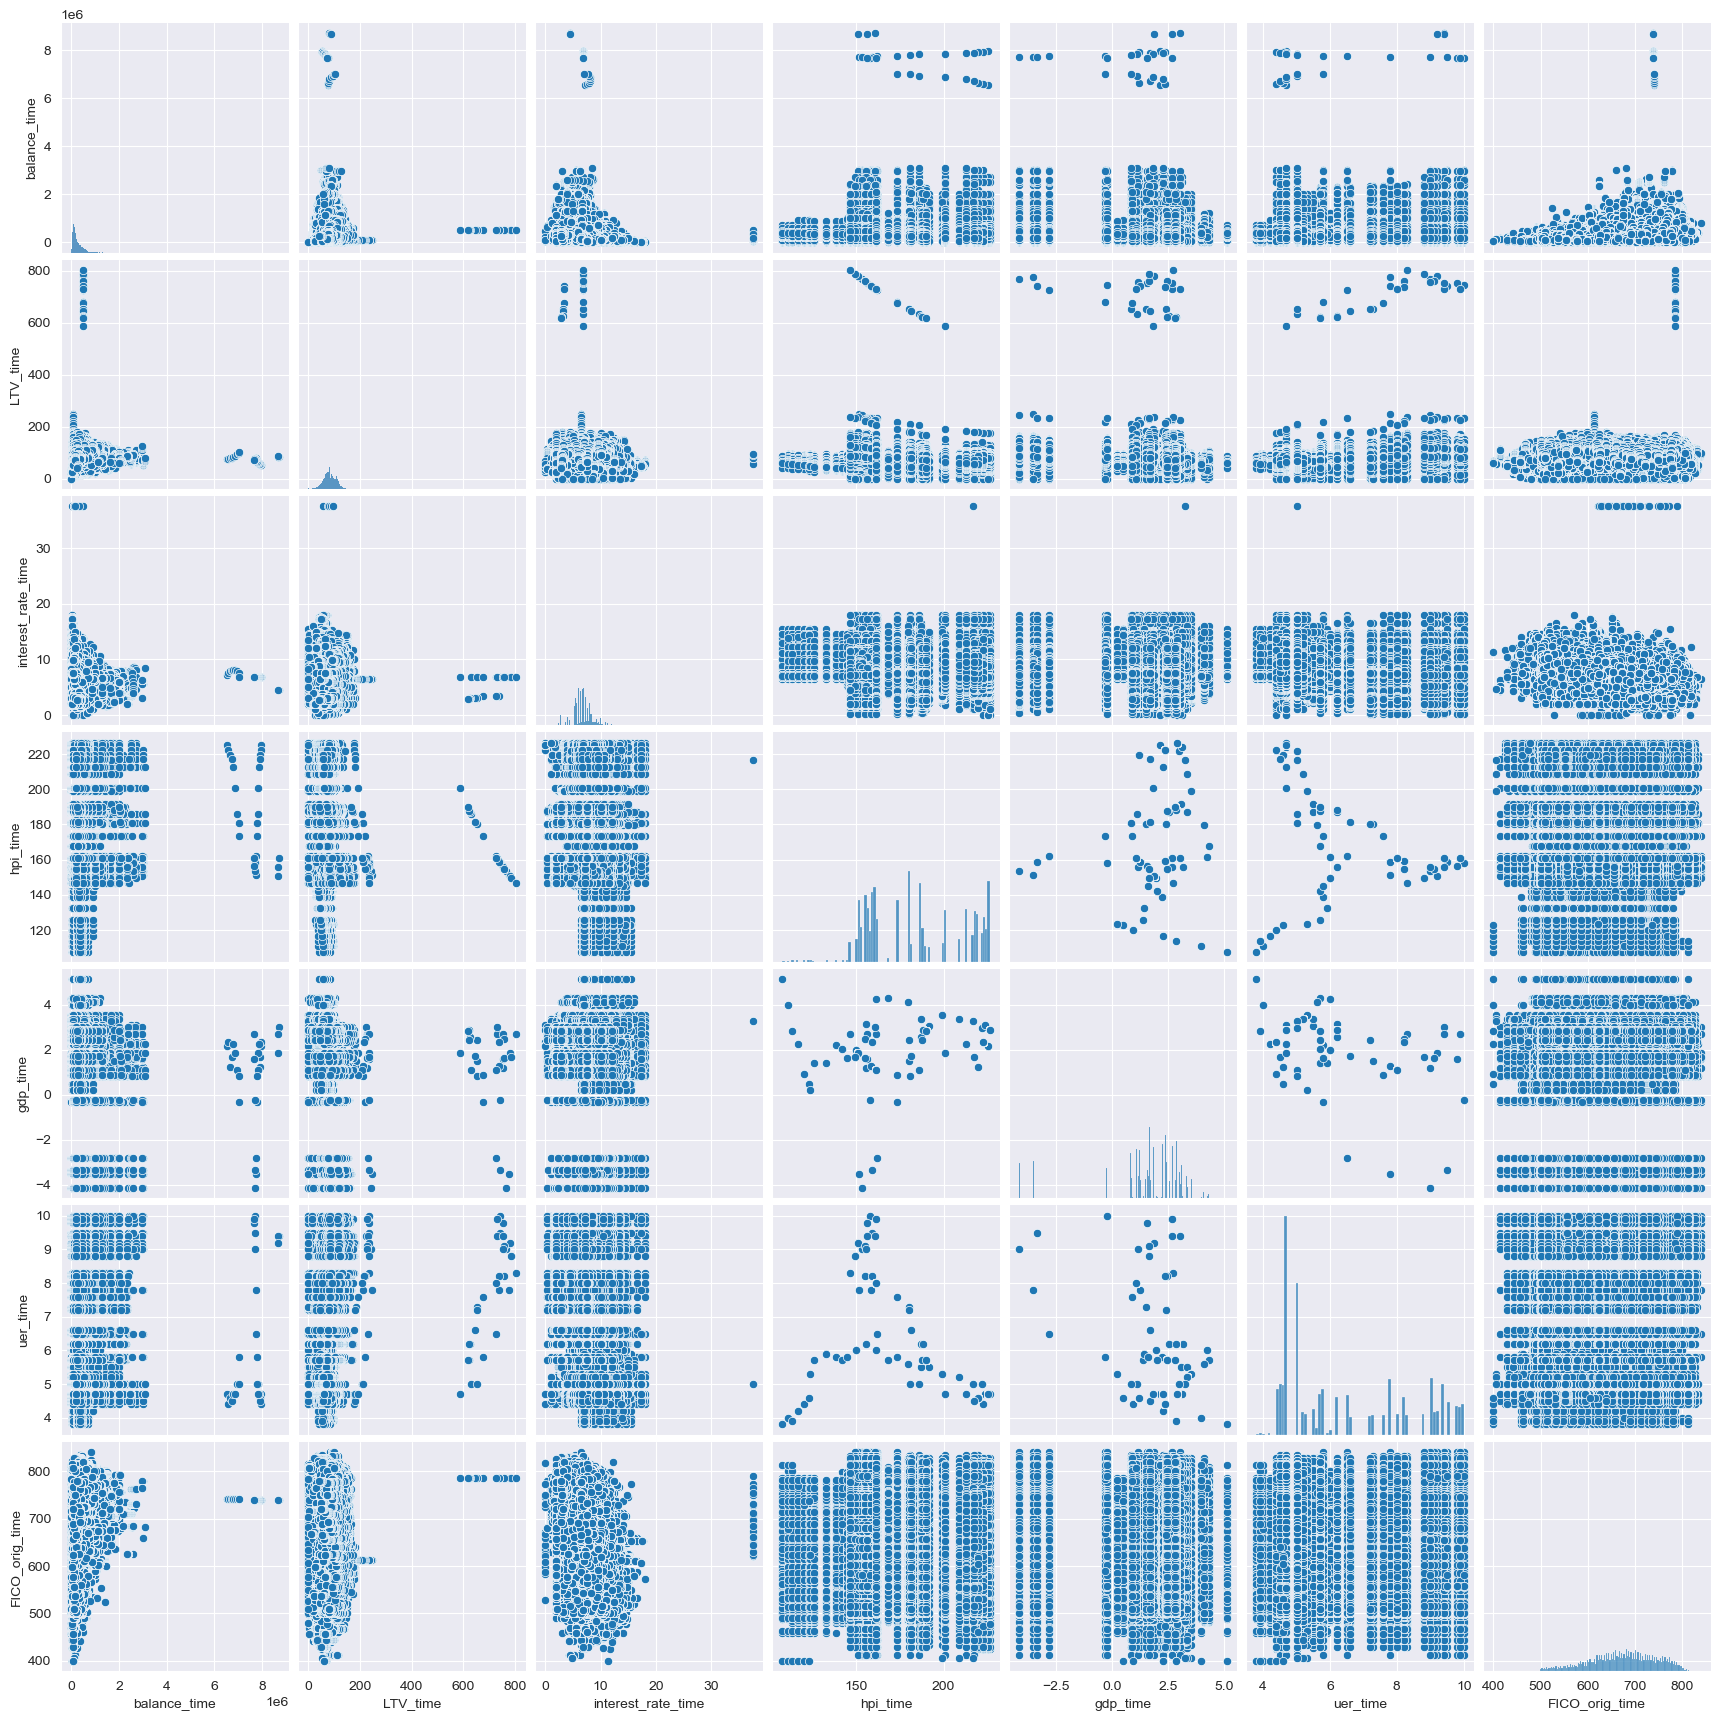

In [17]:
# Pairplot for numeric variables
sns.pairplot(df_dev[['balance_time', 'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'FICO_orig_time']])
plt.show()


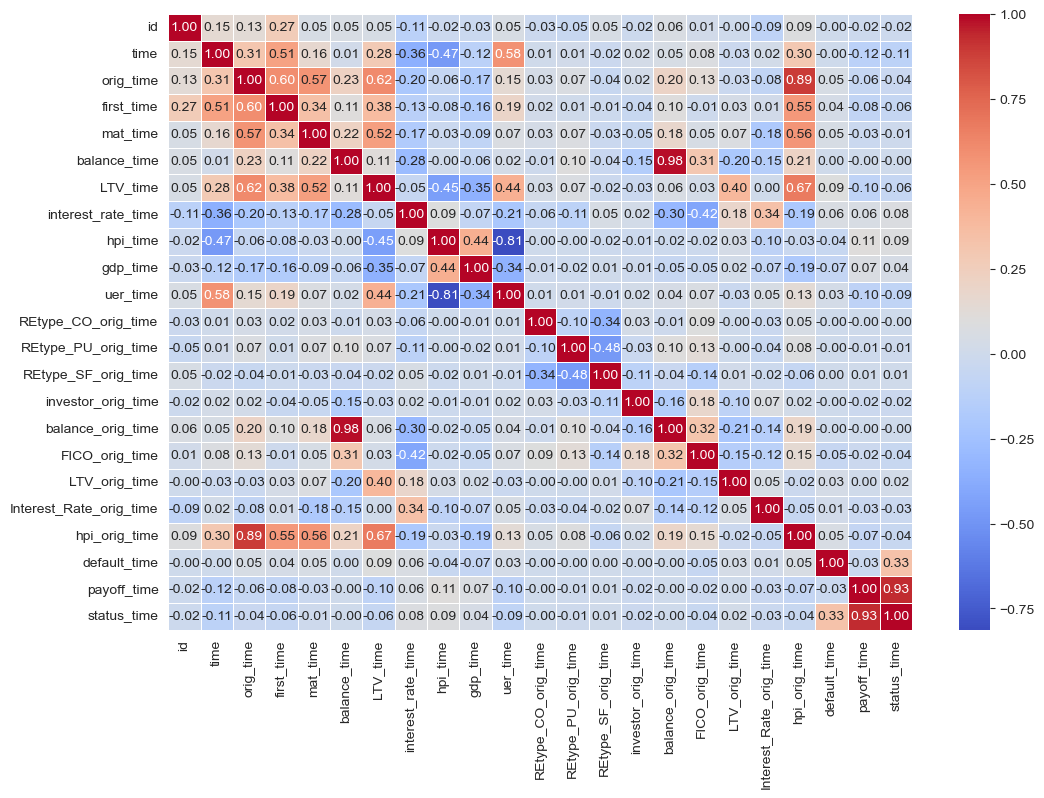

In [18]:
 # Correlation heatmap
correlation_matrix = df_dev.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


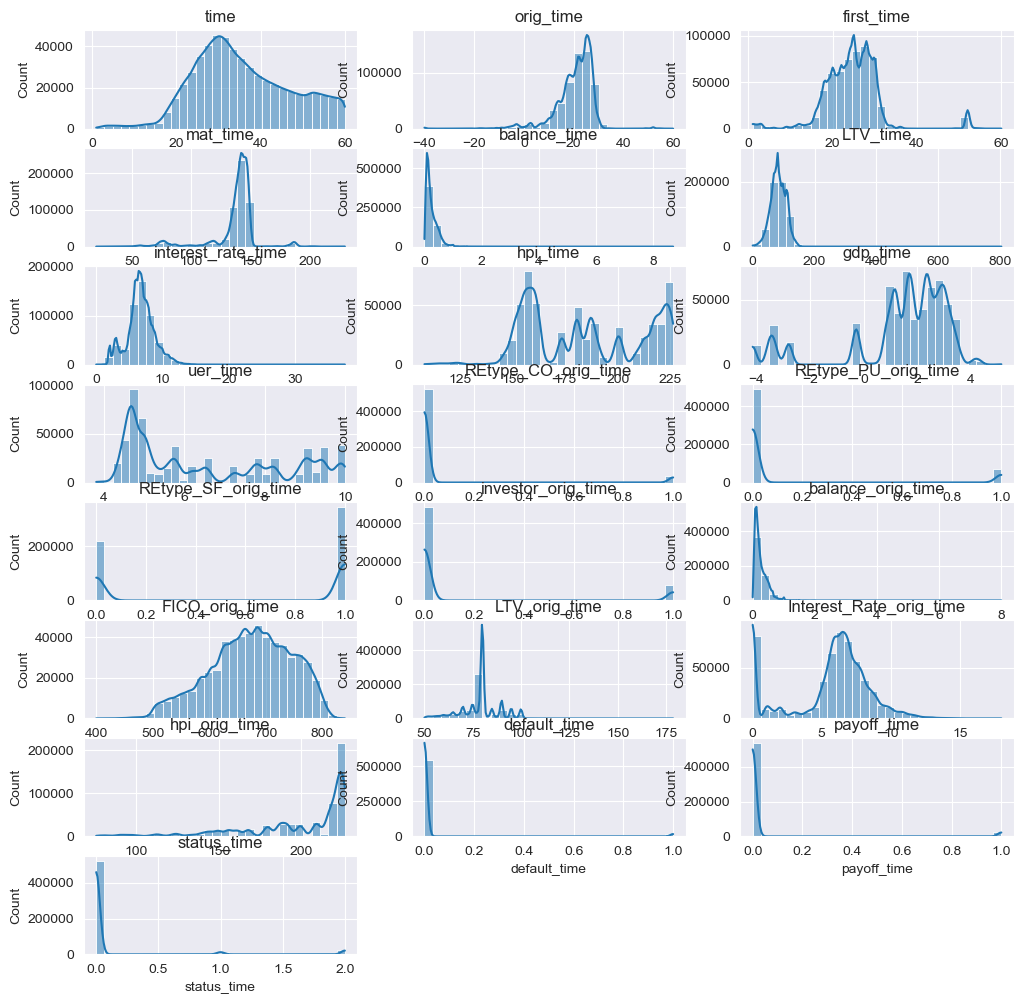

In [26]:
# Plot distributions
plt.figure(figsize=(12, 12))
for i, feature in enumerate(num_vars, 1):
    plt.subplot(8, 3, i)
    sns.histplot(df_dev[feature], bins=30, kde=True)
    plt.title(f'{feature}')
    plt.xlabel(feature)
    
plt.show()


In [25]:
# Group by home type and calculate the mean FICO score within each home type
home_type_fico_mean = df_dev.groupby(['REtype_SF_orig_time'])['FICO_orig_time'].mean()
print(home_type_fico_mean)

REtype_SF_orig_time
0    686.021304
1    665.877932
Name: FICO_orig_time, dtype: float64


In [ ]:
# TODO: попробовать разные вариации с типом домов и мб другими переменными (пример выше из docs/mortgage_data_inspection.py)

### Step 1.3: Target construction

In [ ]:
# TODO: для начала нужно выбрать кохорт, от какого месяца будем проверять клиентов. Далее разделить тайм по кохорте, и если клиент в это время дефолтил, то он дефолтил в этой кохорте, это может быть 1 или больше месяцев (до 12)